## Домашнее задание 27
### Козел А.Г. 15.02.2023
Провести обучение сети на наборе данных notMNIST_small.

In [1]:
import sys
import sklearn
import tensorflow as tf
import numpy as np
import os
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd
from sklearn import metrics
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding, Dropout

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding, Dropout

In [3]:
tf.__version__

'2.10.1'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Загружаем файлы

In [5]:
data = 'c:\\Users\\37533\\Desktop\\jupyter\\ДЗ_27\\notMNIST_small'

In [6]:
df = []
folders = []
 
for folder in os.listdir('./notMNIST_small'):
    for file in os.listdir(os.path.join(data, folder)):
        try:
            img = Image.open(os.path.join(data, folder, file))
            if (np.array(img)==np.ones(shape=(28,28), dtype=np.uint8)).all()==False and (np.array(img)==np.zeros(shape=(28,28), dtype=np.uint8)).all()==False:
                df.append(np.asarray(img, dtype=np.float32))
                folders.append(folder)
                      
            else:
                continue
        except:
            None 

df = np.asarray(df)
folders = np.asarray(folders)

In [7]:
df.shape

(18724, 28, 28)

Пыталась отфильтровать нулевые и единичные матрицы, но что-то ничего не вышло. Тоже количество осталось

In [8]:
set(folders)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

<Figure size 640x480 with 0 Axes>

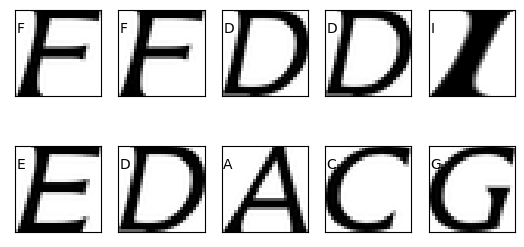

In [9]:
plt.gray()
fig = plt.figure(figsize=(5, 5))  # размер
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5)  # параметры макета подграфика
for i in range(10):
    folder_random = random.choice(folders)
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(plt.imread(os.path.join(data, folder_random, file)),  cmap=plt.cm.binary) 
# для выбора другой цветовой гаммы https://matplotlib.org/3.1.0/_images/sphx_glr_colormaps_003.png
    ax.text(0, 7, str(folder_random)) # целевая метка класса

### Подготовка данных

In [10]:
# Перемешаем случайным образом исходные массивы изображений и меток
y = folders
X =df
encoding = CategoryEncoding(num_tokens=10, output_mode="one_hot")
y_enc = encoding(LabelEncoder().fit_transform(y)).numpy()
np.random.shuffle(np.arange(X.shape[0]))
X, y_enc = X[np.arange(X.shape[0])], y_enc[np.arange(X.shape[0])]
# Выполним нормализацию значений
X = X / 255.0
# Выполним разбиение масивов на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X,y_enc, train_size=0.7, random_state=42)

In [11]:
print(X_train.shape)
len(y_train)

(13106, 28, 28)


13106

### Модель 1

In [20]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128,kernel_size=1),
    DefaultConv2D(filters=128,kernel_size=1),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])



In [21]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)        

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy',
        min_delta=1e-3,
        patience=5,
        verbose=1
    ),]

In [24]:
%%time
history = model.fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
52/52 [==============================] - 4s 61ms/step - loss: 1.7510 - accuracy: 0.3668 - val_loss: 0.6944 - val_accuracy: 0.8382
Epoch 2/30
52/52 [==============================] - 3s 48ms/step - loss: 0.9412 - accuracy: 0.6947 - val_loss: 0.4358 - val_accuracy: 0.8861
Epoch 3/30
52/52 [==============================] - 3s 49ms/step - loss: 0.7247 - accuracy: 0.7678 - val_loss: 0.3751 - val_accuracy: 0.8944
Epoch 4/30
52/52 [==============================] - 3s 49ms/step - loss: 0.6076 - accuracy: 0.8083 - val_loss: 0.3099 - val_accuracy: 0.9112
Epoch 5/30
52/52 [==============================] - 2s 48ms/step - loss: 0.5364 - accuracy: 0.8315 - val_loss: 0.2891 - val_accuracy: 0.9124
Epoch 6/30
52/52 [==============================] - 3s 49ms/step - loss: 0.4762 - accuracy: 0.8472 - val_loss: 0.2827 - val_accuracy: 0.9165
Epoch 7/30
52/52 [==============================] - 3s 49ms/step - loss: 0.4403 - accuracy: 0.8632 - val_loss: 0.2608 - val_accuracy: 0.9249
Epoch 8/30
52

In [25]:
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

Accuracy на тестовых данных: 94.57%


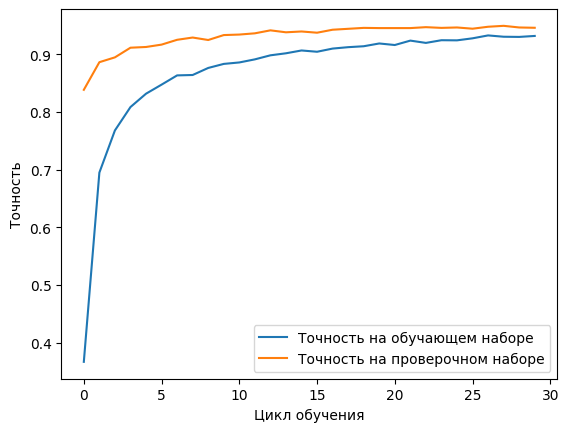

In [26]:
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(
    history.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Цикл обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()
pass

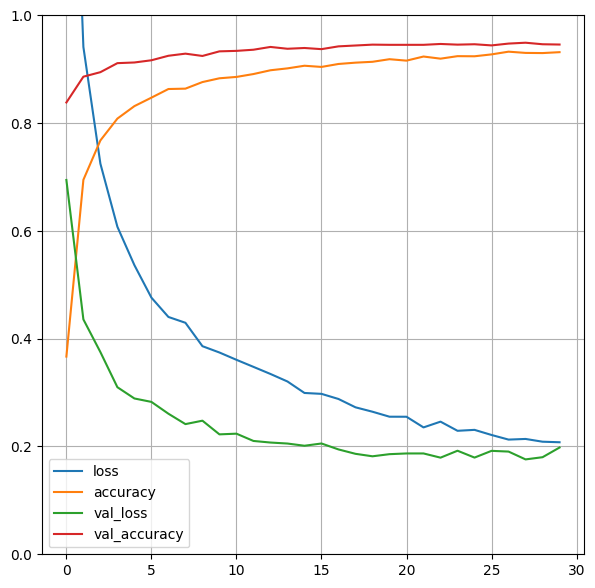

In [29]:
pd.DataFrame(history.history).plot(figsize=(7, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Модель 2

In [45]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
model_checkpoint_doc_init = ModelCheckpoint(
    'models/doc_init_model.h5', 'val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping('val_accuracy', patience=30, verbose=1)
reduce_lr = ReduceLROnPlateau(
    factor=0.1, patience=5, min_lr=0.00001, verbose=1)

In [46]:
aug = ImageDataGenerator(rotation_range=10, 
                         width_shift_range=0.1,
                         height_shift_range=0.1)

In [47]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [48]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [44]:
history = model.fit_generator(
    aug.flow(X_train, y_train, batch_size=64),
    validation_data=[X_valid, y_valid],
    epochs=20,
    verbose=1,
    callbacks=[model_checkpoint_doc_init, early_stop, reduce_lr])
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (13106, 28, 28))